In [1]:
# Import Libraries
from tensorflow.keras.preprocessing.image import load_img
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


In [2]:
# My data is in google drive.
train_dir = "D://Docs//Smart India Hackathon//Medicinal Leaf Dataset//Segmented Medicinal Leaf Images//"
test_dir="D://Docs//Smart India Hackathon//Medicinal Leaf Dataset//Segmented Medicinal Leaf Images//"


In [3]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [4]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

30 Classes
1835 Train images
1835 Test images


In [5]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =512

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True, target_size=(img_width,img_height), batch_size=batch_size)

Found 1835 images belonging to 30 classes.


Found 1835 images belonging to 30 classes.


In [7]:
train_generator.class_indices

{'Alpinia Galanga (Rasna)': 0,
 'Amaranthus Viridis (Arive-Dantu)': 1,
 'Artocarpus Heterophyllus (Jackfruit)': 2,
 'Azadirachta Indica (Neem)': 3,
 'Basella Alba (Basale)': 4,
 'Brassica Juncea (Indian Mustard)': 5,
 'Carissa Carandas (Karanda)': 6,
 'Citrus Limon (Lemon)': 7,
 'Ficus Auriculata (Roxburgh fig)': 8,
 'Ficus Religiosa (Peepal Tree)': 9,
 'Hibiscus Rosa-sinensis': 10,
 'Jasminum (Jasmine)': 11,
 'Mangifera Indica (Mango)': 12,
 'Mentha (Mint)': 13,
 'Moringa Oleifera (Drumstick)': 14,
 'Muntingia Calabura (Jamaica Cherry-Gasagase)': 15,
 'Murraya Koenigii (Curry)': 16,
 'Nerium Oleander (Oleander)': 17,
 'Nyctanthes Arbor-tristis (Parijata)': 18,
 'Ocimum Tenuiflorum (Tulsi)': 19,
 'Piper Betle (Betel)': 20,
 'Plectranthus Amboinicus (Mexican Mint)': 21,
 'Pongamia Pinnata (Indian Beech)': 22,
 'Psidium Guajava (Guava)': 23,
 'Punica Granatum (Pomegranate)': 24,
 'Santalum Album (Sandalwood)': 25,
 'Syzygium Cumini (Jamun)': 26,
 'Syzygium Jambos (Rose Apple)': 27,
 'Tab

In [8]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [9]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


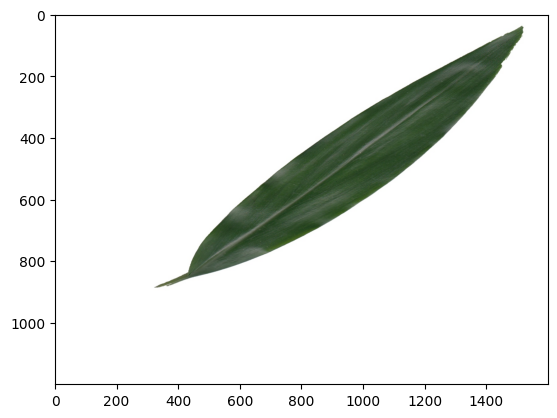

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

img1 = load_img(
    "D://Docs//Smart India Hackathon//Medicinal Leaf Dataset//Segmented Medicinal Leaf Images//Alpinia Galanga (Rasna)//AG-S-001.jpg")
plt.imshow(img1)

# Preprocess image
img1 = load_img(
    "D://Docs//Smart India Hackathon//Medicinal Leaf Dataset//Segmented Medicinal Leaf Images//Alpinia Galanga (Rasna)//AG-S-001.jpg", target_size=(256, 256))
img = img_to_array(img1)
img = img / 255
img = np.expand_dims(img, axis=0)
# "D:\Docs\Smart India Hackathon\Medicinal Leaf Dataset\Segmented Medicinal Leaf Images\Alpinia Galanga (Rasna)"


In [11]:

# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

1/1 [==============================] - 0s 71ms/step


In [12]:
DATASET_DIR = "D://Docs//Smart India Hackathon//all_dataset"
DATASET_TRAIN_DIR = os.path.join(
    DATASET_DIR, "/")  # Update the directory path
DATASET_TEST_DIR = os.path.join(
    DATASET_DIR, "/")  # Update the directory path

# Define the number of classes in your dataset
num_classes = len(os.listdir(DATASET_DIR))
print (num_classes)

169


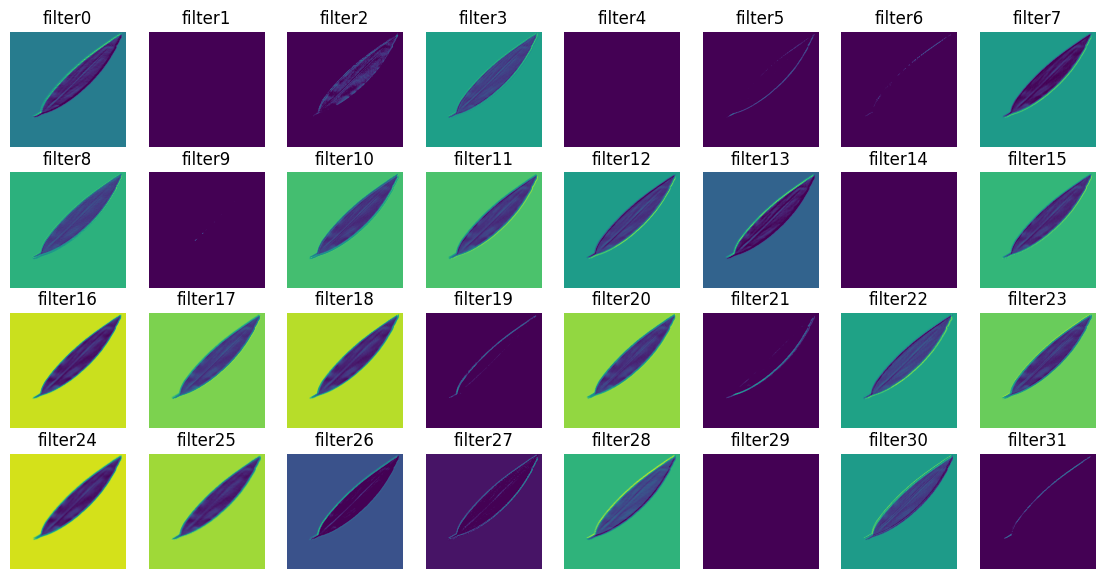

In [13]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

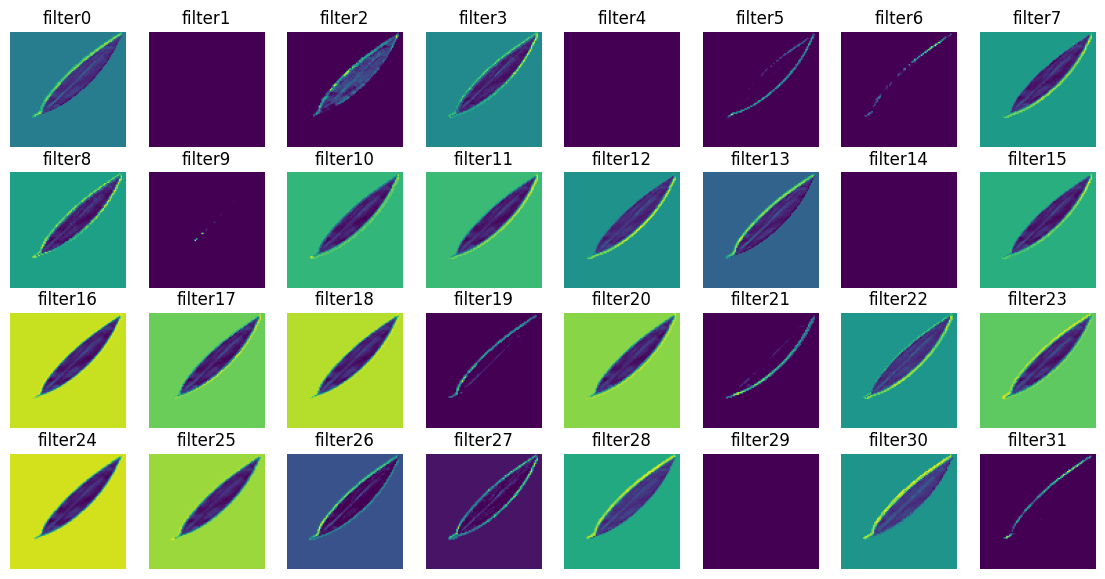

In [14]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

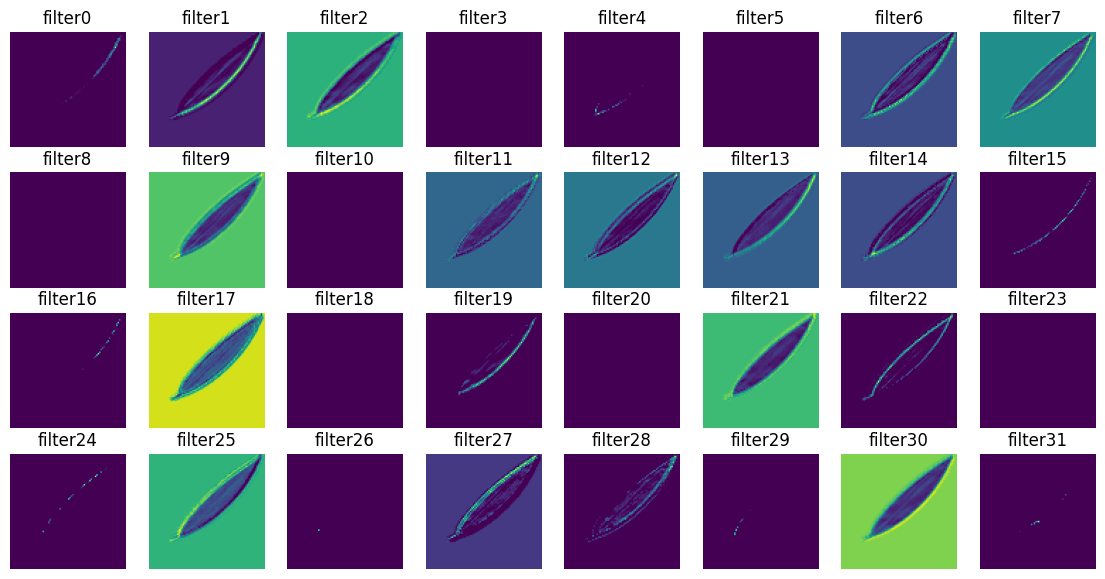

In [15]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

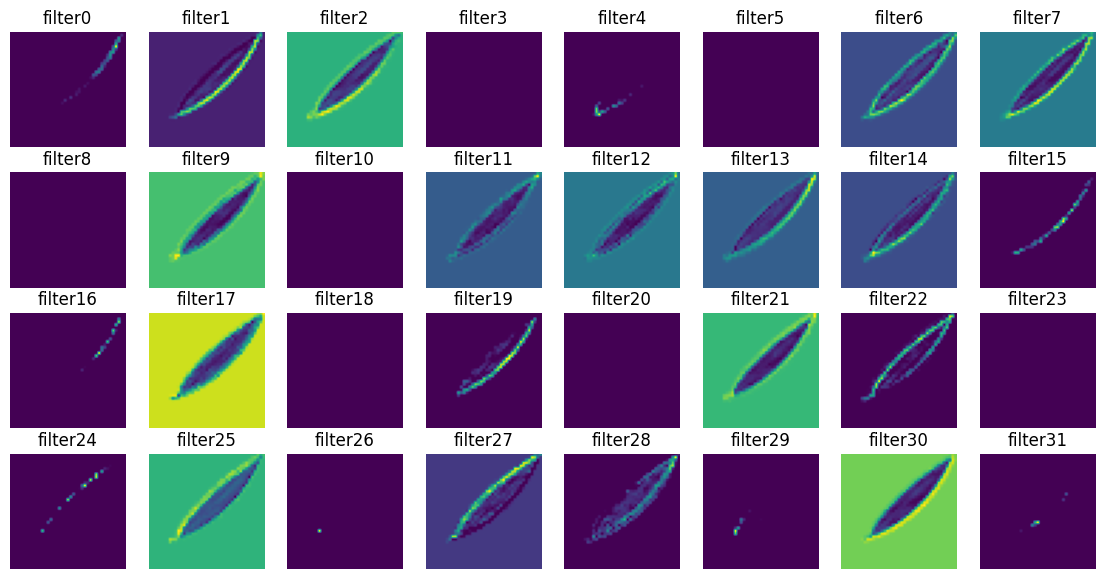

In [16]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

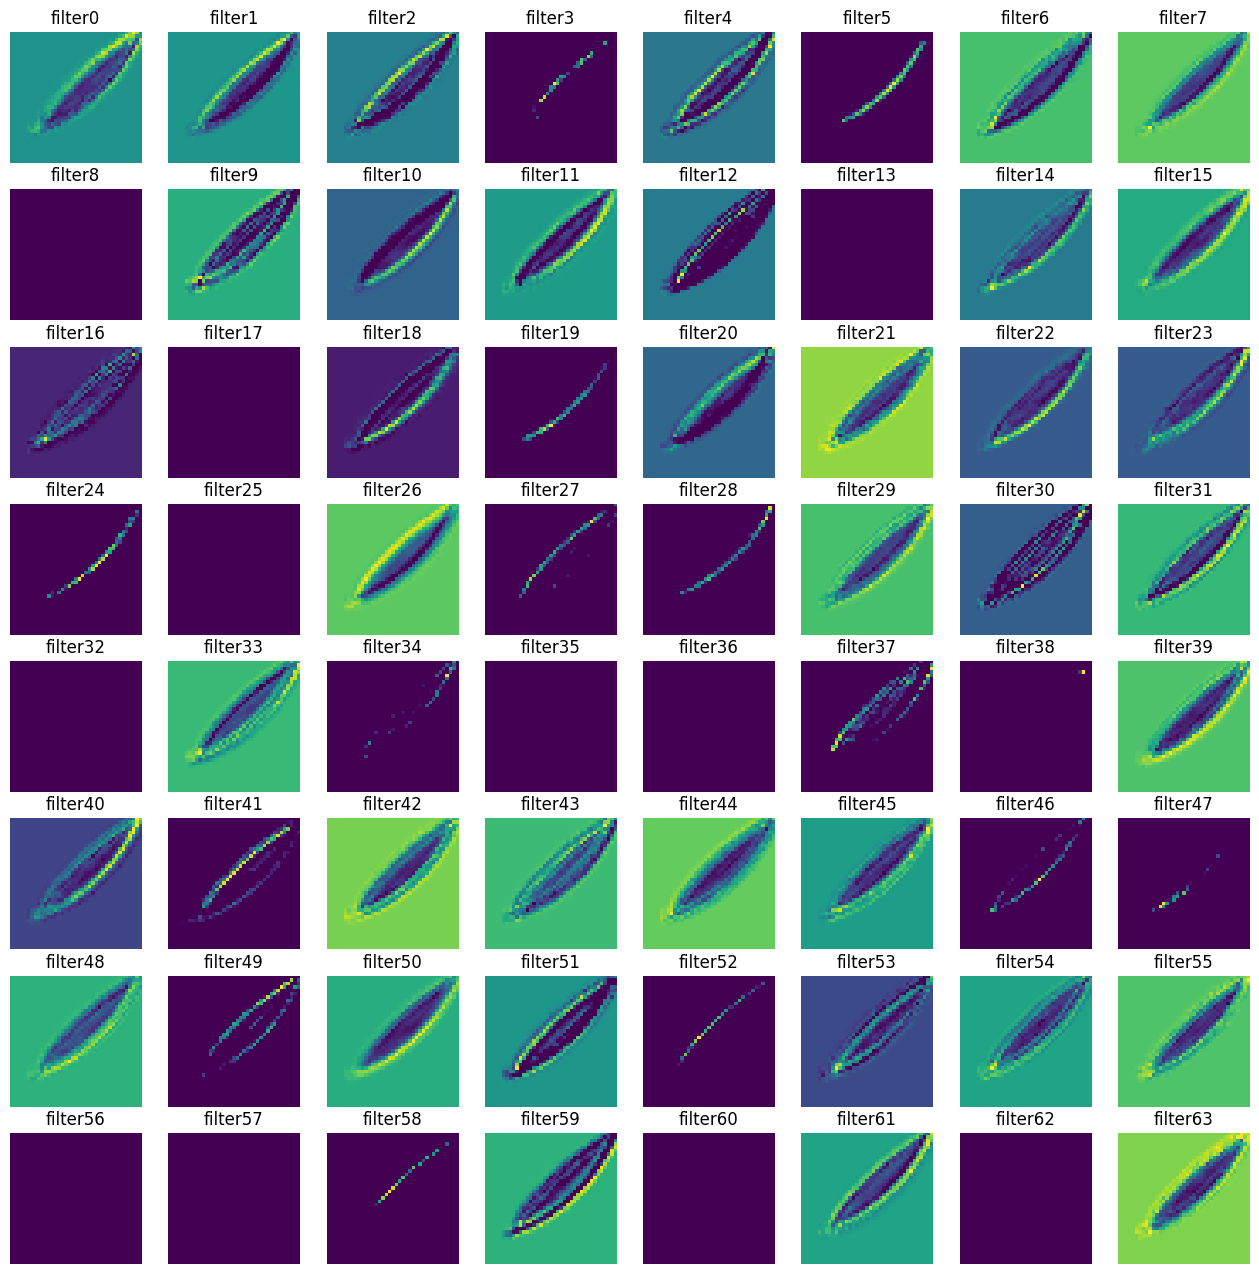

In [17]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

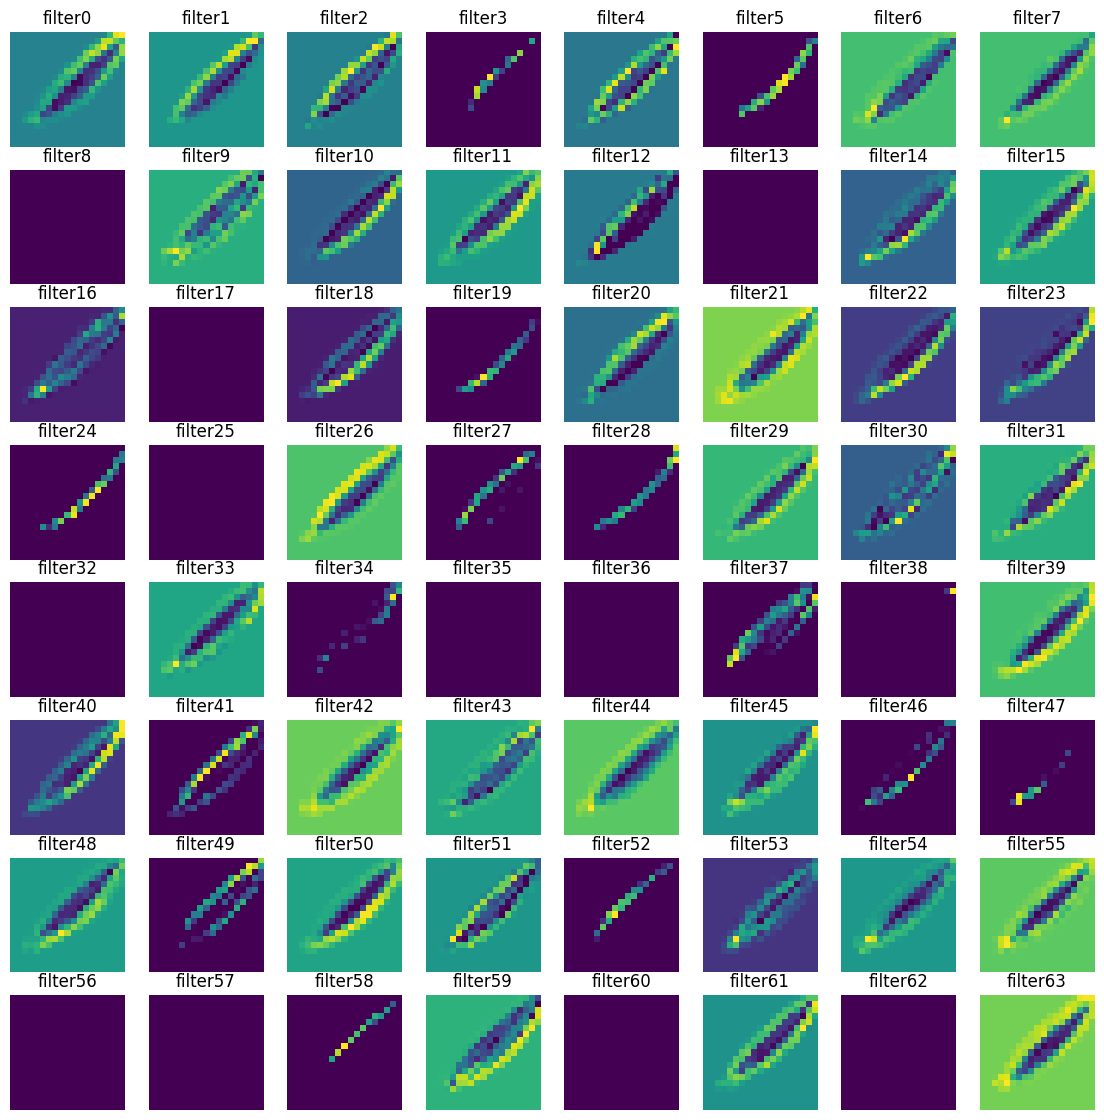

In [18]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

In [19]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 1835 images belonging to 30 classes.


Epoch 1/75
3/3 [==============================] - 116s 43s/step - loss: 3.6553 - accuracy: 0.0514 - val_loss: 3.3759 - val_accuracy: 0.0527
Epoch 2/75
3/3 [==============================] - 94s 35s/step - loss: 3.3737 - accuracy: 0.0590 - val_loss: 3.3291 - val_accuracy: 0.1022
Epoch 3/75
3/3 [==============================] - 90s 33s/step - loss: 3.3091 - accuracy: 0.0960 - val_loss: 3.2194 - val_accuracy: 0.1309
Epoch 4/75
3/3 [==============================] - 86s 32s/step - loss: 3.1944 - accuracy: 0.1338 - val_loss: 3.0148 - val_accuracy: 0.1641
Epoch 5/75
3/3 [==============================] - 94s 36s/step - loss: 3.0476 - accuracy: 0.1510 - val_loss: 2.8163 - val_accuracy: 0.2025
Epoch 6/75
3/3 [==============================] - 95s 41s/step - loss: 2.8528 - accuracy: 0.1761 - val_loss: 2.6433 - val_accuracy: 0.2350
Epoch 7/75
3/3 [==============================] - 131s 57s/step - loss: 2.7355 - accuracy: 0.2200 - val_loss: 2.5321 - val_accuracy: 0.2936
Epoch 8/75
3/3 [=========

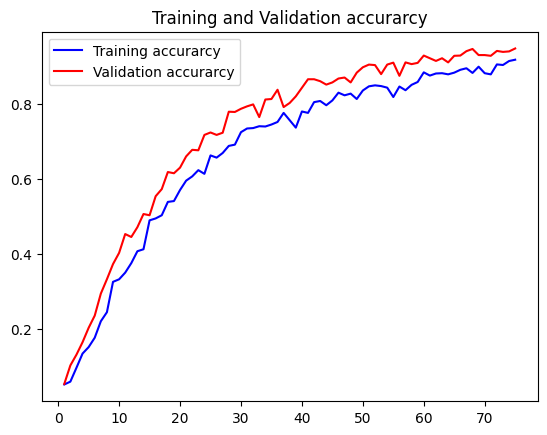

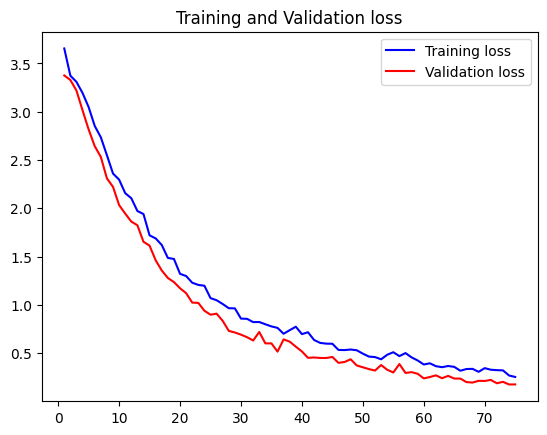

In [20]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
train = model.fit_generator(train_generator,
                            epochs=75,
                            steps_per_epoch=train_generator.samples // batch_size,
                            validation_data=validation_generator,
                            validation_steps=validation_generator.samples // batch_size,
                            verbose=1)


acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [21]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

4/4 [==============================] - 20s 5s/step - loss: 0.1095 - accuracy: 0.9728
Test score is 0.10950888693332672
Test accuracy is 0.972752034664154


In [22]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('leaf.h5')

In [23]:
# Save model weights.
from keras.models import load_model
model.save_weights('leaf_weights.h5')

In [24]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes


{'Alpinia Galanga (Rasna)': 0,
 'Amaranthus Viridis (Arive-Dantu)': 1,
 'Artocarpus Heterophyllus (Jackfruit)': 2,
 'Azadirachta Indica (Neem)': 3,
 'Basella Alba (Basale)': 4,
 'Brassica Juncea (Indian Mustard)': 5,
 'Carissa Carandas (Karanda)': 6,
 'Citrus Limon (Lemon)': 7,
 'Ficus Auriculata (Roxburgh fig)': 8,
 'Ficus Religiosa (Peepal Tree)': 9,
 'Hibiscus Rosa-sinensis': 10,
 'Jasminum (Jasmine)': 11,
 'Mangifera Indica (Mango)': 12,
 'Mentha (Mint)': 13,
 'Moringa Oleifera (Drumstick)': 14,
 'Muntingia Calabura (Jamaica Cherry-Gasagase)': 15,
 'Murraya Koenigii (Curry)': 16,
 'Nerium Oleander (Oleander)': 17,
 'Nyctanthes Arbor-tristis (Parijata)': 18,
 'Ocimum Tenuiflorum (Tulsi)': 19,
 'Piper Betle (Betel)': 20,
 'Plectranthus Amboinicus (Mexican Mint)': 21,
 'Pongamia Pinnata (Indian Beech)': 22,
 'Psidium Guajava (Guava)': 23,
 'Punica Granatum (Pomegranate)': 24,
 'Santalum Album (Sandalwood)': 25,
 'Syzygium Cumini (Jamun)': 26,
 'Syzygium Jambos (Rose Apple)': 27,
 'Tab

In [1]:
# Loading model and predict.
from keras.models import load_model
model=load_model('leaf.h5')

Classes = ['Alpinia Galanga (Rasna)',
           'Amaranthus Viridis (Arive-Dantu)',
           'Artocarpus Heterophyllus (Jackfruit)',
           'Azadirachta Indica (Neem)',
           'Basella Alba (Basale)',
           'Brassica Juncea (Indian Mustard)',
           'Carissa Carandas (Karanda)',
           'Citrus Limon (Lemon)',
           'Ficus Auriculata (Roxburgh fig)',
           'Ficus Religiosa (Peepal Tree)',
           'Hibiscus Rosa-sinensis',
           'Jasminum (Jasmine)',
           'Mangifera Indica (Mango)',
           'Mentha (Mint)',
           'Moringa Oleifera (Drumstick)',
           'Muntingia Calabura (Jamaica Cherry-Gasagase)',
           'Murraya Koenigii (Curry)',
           'Nerium Oleander (Oleander)',
           'Nyctanthes Arbor-tristis (Parijata)',
           'Ocimum Tenuiflorum (Tulsi)',
           'Piper Betle (Betel)',
           'Plectranthus Amboinicus (Mexican Mint)',
           'Pongamia Pinnata (Indian Beech)',
           'Psidium Guajava (Guava)',
           'Punica Granatum (Pomegranate)',
           'Santalum Album (Sandalwood)',
           'Syzygium Cumini (Jamun)',
           'Syzygium Jambos (Rose Apple)',
           'Tabernaemontana Divaricata (Crape Jasmine)',
           'Trigonella Foenum-graecum (Fenugreek)']


1/1 [==============================] - 0s 378ms/step
Piper Betle (Betel)


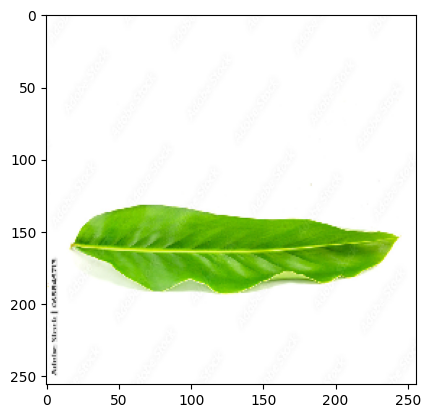

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Pre-Processing test data same as train data.
img_width = 256
img_height = 256


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x / 255
    return np.expand_dims(x, axis=0)


result = model.predict(
    [prepare("C://Users//DHIRAAJ//Downloads//test1_alpinia.jpg")])
predicted_class = np.argmax(result)
disease = image.load_img(
    "C://Users//DHIRAAJ//Downloads//test1_alpinia.jpg", target_size=(256, 256))
plt.imshow(disease)
print(Classes[predicted_class])


In [7]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('leaf.h5')

# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
open("output.tflite", "wb").write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\DHIRAAJ\AppData\Local\Temp\tmpa6difkx7\assets


INFO:tensorflow:Assets written to: C:\Users\DHIRAAJ\AppData\Local\Temp\tmpa6difkx7\assets


47722392